## Imports

In [29]:
import numpy as np
import matplotlib.pyplot as plt

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [6]:
def solve_1d_nonlinearconv_pure(u, nt, nx, dt, dx):

    #fill the update of u    
    
    for n in range(nt):
        for i in range(1,nx):
            u[i]=u[i]-dt/dx*u[i]*(u[i]-u[i-1])

    
    return 0

## Numba accelerator

In [7]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u, nt, nx, dt, dx):

    #fill the update of u
    
    for n in range(nt):
        for i in range(1,nx):
            u[i]=u[i]-dt/dx*u[i]*(u[i]-u[i-1])
    
    return 0

## Pyccel accelerator

In [30]:
@types('float[:]', 'int', 'int', 'float','float')
def solve_1d_nonlinearconv_pyccel(u, nt, nx, dt, dx):

    #fill the update of u
    
    for n in range(nt):
        for i in range(1,nx):
            u[i]=u[i]-dt/dx*u[i]*(u[i]-u[i-1])
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

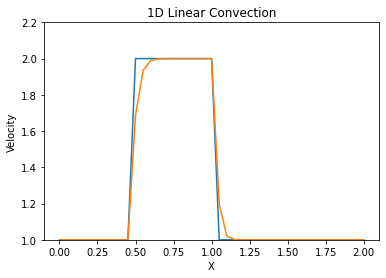

In [18]:
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 10    #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
#un = np.ones(nx)   #pas important da

solve_1d_nonlinearconv_pure(u, nt, nx, dt, dx)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions

### Pure function

In [11]:
%timeit solve_1d_nonlinearconv_pure(u, nt, nx, dt, dx)

351 µs ± 4.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Function with numba accelerator

In [12]:
%timeit solve_1d_nonlinearconv_numba(u, nt, nx, dt, dx)

1.36 µs ± 9.39 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Function with pyccel accelerator

In [31]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

In [32]:
%timeit solve_1d_nonlinearconv_f90(u, nt, nx, dt, dx)

1.27 µs ± 1.21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
